# Food Demand Project : Team E

## Topic: Tanzania

## Goals:

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(B) Nutritional content of different foods](#nutrition)
* [(B) Nutritional adequacy of diet](#adequacy)
* [(A) Estimate Demand System](#demand)
* [(C) Counterfactual Experiments](#counterfactual)
* [(A) Presentation](#presentation)

### Setup

In [1]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [4]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'
Tanzania_Identification_Data = '1p3gYGd5L-E5F79RlguvXXQpcwc3G_vF58A2TYvmyGm4'

In [51]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
x = x[x['m'] != 'Nan']
x = x.astype({'i':'int64'})

t_map = {2008: '2008-09', 2010:'2010-11', 2012: '2012-13', 2014:'2014-15'}
x_info = read_sheets(Tanzania_Identification_Data,sheet='ID')
x_info = x_info.loc[x_info['t'] < 2015]
x_info = x_info.replace({"t": t_map})

x = pd.merge(x, x_info,  how='left', left_on=['i','t'], right_on = ['i','t'])
x = x[x['urb_rur'] == 'RURAL']
x = x.drop(columns=['urb_rur'])

# Reformat x to match structure
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns='j', aggfunc='first').reset_index()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))



Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [56]:
# Change 'Tanzania' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'
d = d[d['m'] != 'Nan']
d = d.astype({'i':'int64'})
# d = d[d['i'] == '9003-001-99']
# d
d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.


In [57]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

In [58]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
2 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
2 2008-09 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
2 2008-09 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
2 2008-09 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...     Sugar  Sugarcane  \
i t       m                              ...                        
1 2008-09 Mainland Rural            NaN  ...  6.396930        NaN   
  2010-11 Mainland Rural            NaN  ...  8.055158        NaN   
  2012-13 Mainland Rural            NaN  ...       NaN        NaN   
  2014-15 Mainland Rural            NaN  ...  6.907755   6.907755   
2 2008-09 Mainland Rural            NaN  ...  6.396930        NaN   

j                         Sweet potatoes  Sweets  Tea (dry)  \
i t       m                                                   
1 2008-09 Mainland Rural             NaN     NaN   4.499810   
  2010-11 Mainland Rural             NaN     NaN   5.703782   
  2012-13 Mainland Rural             NaN     NaN        NaN   
  2014-15 Mainland Rural             NaN     NaN   5.521461   
2 2008-09 Mainland Rural             NaN     NaN   4.499810   

j                         WHEAT, BARLEY, GRAIN, AND OTHER CEREALS  \
i t       m                                                         
1 2008-09 Mainland Rural                                      NaN   
  2010-11 Mainland Rural                                      NaN   
  2012-13 Mainland Rural                                      NaN   
  2014-15 Mainland Rural                                      NaN   
2 2008-09 Mainland Rural                                      NaN   

j                         Wheat (flour)  Wild birds and insects  \
i t       m                                                       
1 2008-09 Mainland Rural            NaN                     NaN   
  2010-11 Mainland Rural            NaN                     NaN   
  2012-13 Mainland Rural            NaN                     NaN   
  2014-15 Mainland Rural       8.006368                     NaN   
2 2008-09 Mainland Rural            NaN                     NaN   

j                         Wine and spirits  Yams/cocoyams  
i t       m                                                
1 2008-09 Mainland Rural               NaN            NaN  
  2010-11 Mainland Rural               NaN            NaN  
  2012-13 Mainland Rural               NaN            NaN  
  2014-15 Mainland Rural              

In [59]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=10)

In [60]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

## (B) Nutritional content of different foods <a class="anchor" id="nutrition"></a>
For all the foods we are considering for our population, we will describe their nutritional content, in terms that allow us to compare with recommended daily allowances. We'll be using ____ recommendations, which is better suited for our population.

## (B) Nutritional adequacy of diet<a class="anchor" id="adequacy"></a>
Now that we have the data for our food, we will try to analyze the adequacy of the diets in the population we're studying. What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [61]:
y = y.stack()

d = d.stack()

# Remove duplicate indexes
idx = np.unique(d.index.values, return_index = True)[1]
d = d.iloc[idx] 

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [62]:
d

i      t        m               k            
1      2012-13  Mainland Rural  Females 00-03    0.000000
                                Females 04-08    0.000000
                                Females 09-13    0.000000
                                Females 14-18    0.000000
                                Females 19-30    0.000000
                                                   ...   
13313  2014-15  Mainland Rural  Males 19-30      1.000000
                                Males 31-50      0.000000
                                Males 51-99      1.000000
                                Rural            1.000000
                                log HSize        2.484907
Length: 19200, dtype: float64

In [63]:
from cfe import Regression

result = Regression(y=y,d=d)

In [64]:
result.predicted_expenditures()

i      t        m               j                                       
1      2012-13  Mainland Rural  Beef                                        2645.565868
                                Bread                                        793.882463
                                Cooking oil                                  874.179403
                                Dried/salted/canned fish                    1092.302534
                                Fresh fish                                  1066.673932
                                                                               ...     
13313  2014-15  Mainland Rural  Salt                                         321.344525
                                Soft drinks                                 4846.902046
                                Spinach, cabbage, other green vegetables    1352.778618
                                Sugar                                       3162.970007
                                Tea (dry)      

<IPython.core.display.Javascript object>


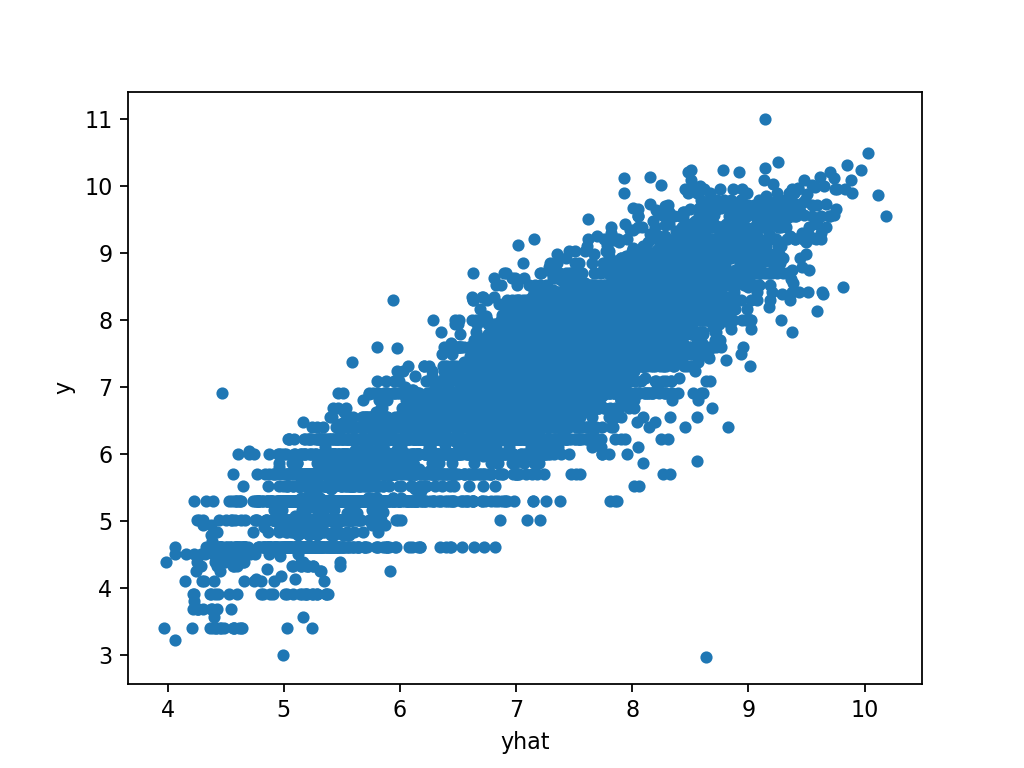

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [65]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters

### (Relative) Income Elasticity

In [66]:
result.get_beta().sort_values()

j
Maize (flour)                                            0.044060
Salt                                                     0.121738
Tea (dry)                                                0.243032
Irish potatoes                                           0.253124
Mangoes                                                  0.253328
Bread                                                    0.272105
Peas, beans, lentils and other pulses                    0.321259
Beef                                                     0.332106
Sugar                                                    0.335211
Rice (husked)                                            0.347950
Dried/salted/canned fish                                 0.370014
Soft drinks                                              0.385446
Spinach, cabbage, other green vegetables                 0.400727
Cooking oil                                              0.484598
Fresh fish                                               0.553419
Onions, 

<IPython.core.display.Javascript object>


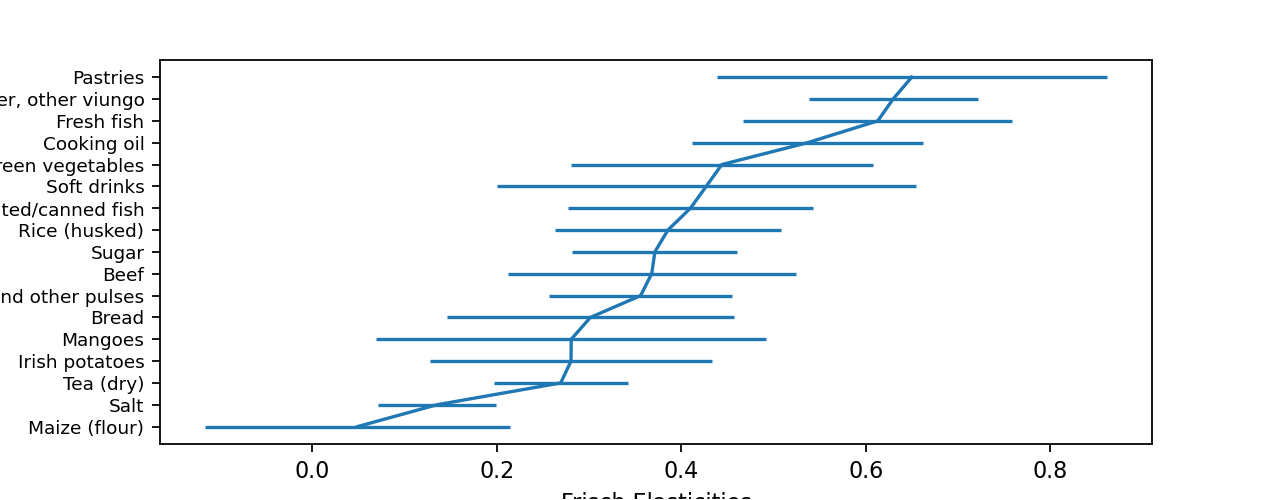

<IPython.core.display.Javascript object>


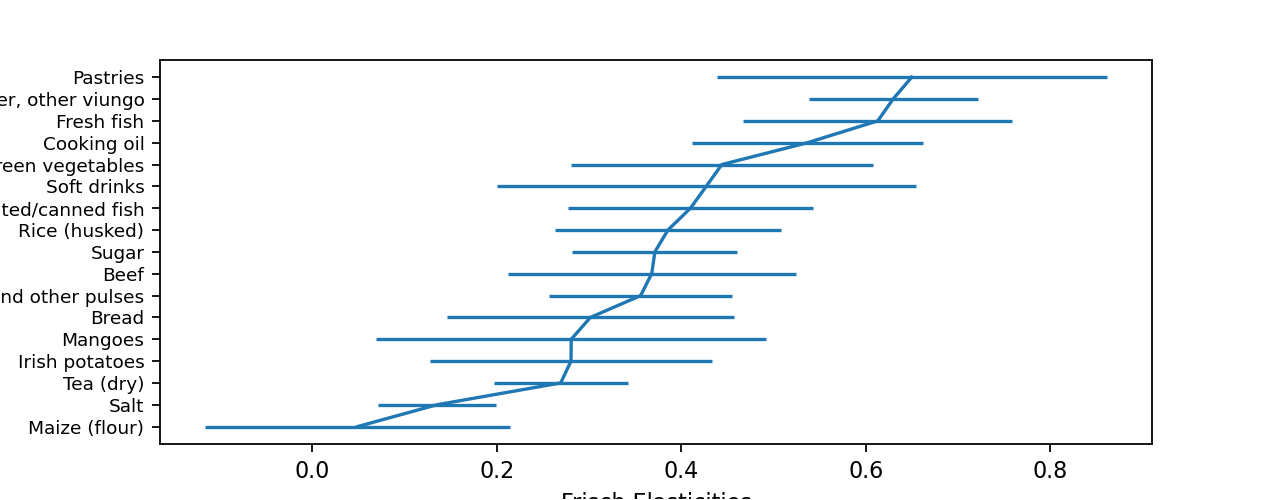

In [67]:
result.graph_beta()

### Demand and Household Composition¶

In [13]:
result.gamma

NameError: name 'result' is not defined

## (C) Counterfactual Experiments<a class="anchor" id="counterfactual"></a>
If everyone's total food expenditures doubled (holding prices fixed)
how would this affect nutrition in the population? What if relative food prices changed?
Think of other counterfactual experiments that might be interesting.

## (A) Presentation<a class="anchor" id="prensentation"></a>